In [1]:
import pandas as pd 
import numpy as np

from sklearn.datasets import load_wine

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox

from scipy.stats import skew

In [2]:
wine_data=load_wine()
dir(wine_data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [5]:
wine_data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
wine_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

## 1.Business Problem Statement

In [7]:
#To predict the which class of wine belongs.
#Columns=

# 'alcohol',
#  'malic_acid',
#  'ash',
#  'alcalinity_of_ash',
#  'magnesium',
#  'total_phenols',
#  'flavanoids',
#  'nonflavanoid_phenols',
#  'proanthocyanins',
#  'color_intensity',
#  'hue',
#  'od280/od315_of_diluted_wines',
#  'proline'

# Target Column =

#'class'

## 2.Data Gathering

In [8]:
wine_df=pd.DataFrame(wine_data.data,columns=wine_data.feature_names)
wine_df['class']=wine_data.target

In [9]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 3.EDA

In [10]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [11]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [12]:
wine_df.shape

(178, 14)

In [13]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

### 3.1 Alcohol

<AxesSubplot: xlabel='alcohol', ylabel='Density'>

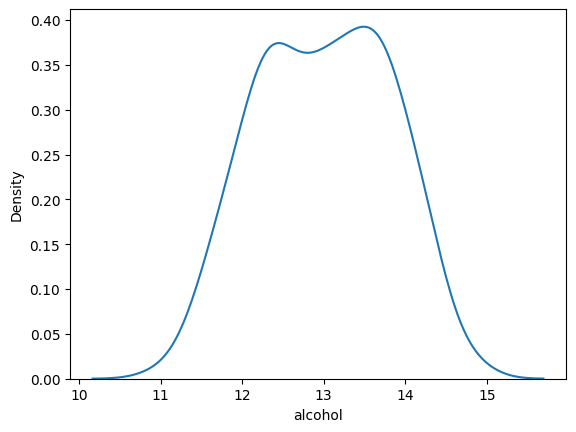

In [14]:
sns.kdeplot(wine_df['alcohol'])

<AxesSubplot: xlabel='alcohol'>

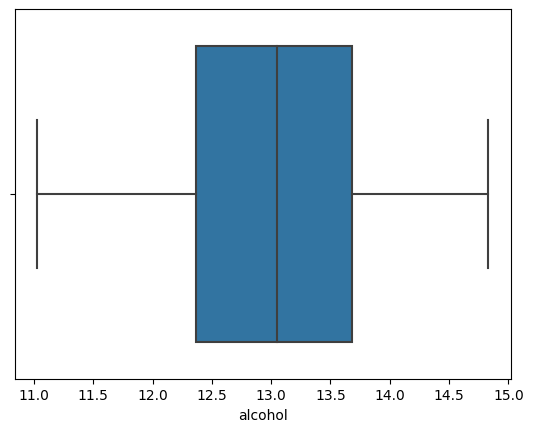

In [15]:
sns.boxplot(x=wine_df['alcohol'])

In [16]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

## 3.2 'malic_acid'

<AxesSubplot: xlabel='malic_acid', ylabel='Density'>

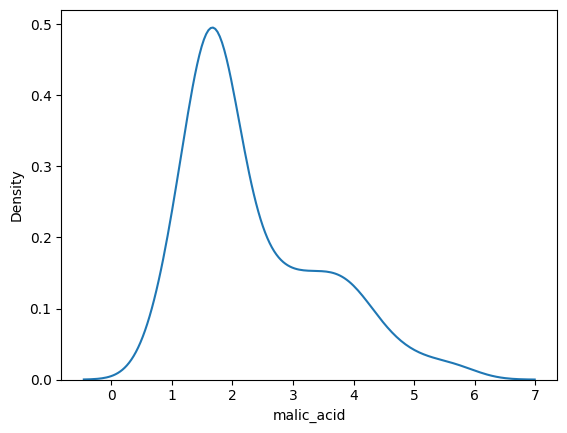

In [17]:
sns.kdeplot(x=wine_df['malic_acid'])

<AxesSubplot: xlabel='malic_acid'>

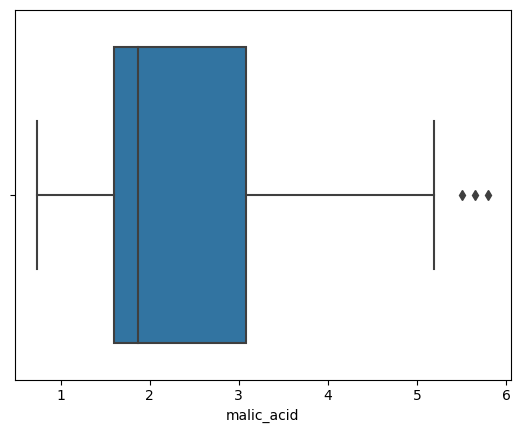

In [18]:
sns.boxplot(x=wine_df['malic_acid'])

In [19]:
skew(wine_df['malic_acid'])

1.0308694978039965

<AxesSubplot: xlabel='malic_acid', ylabel='Density'>

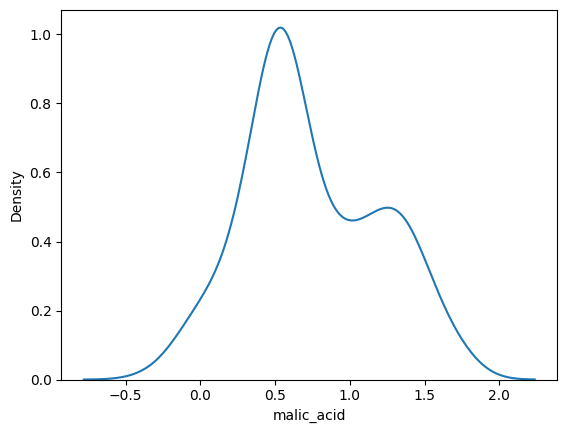

In [20]:
sns.kdeplot(np.log(wine_df['malic_acid']))

In [21]:
np.log(wine_df['malic_acid']).skew()

0.27461334877646965

In [22]:
wine_df['malic_acid']=np.log(wine_df['malic_acid'])

In [23]:
skew(wine_df['malic_acid'])

0.2722937529081863

## 3.3 ash

<AxesSubplot: xlabel='ash', ylabel='Density'>

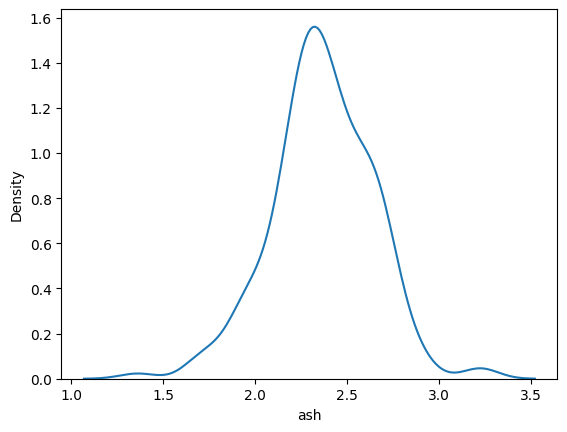

In [24]:
sns.kdeplot(wine_df['ash'])

In [25]:
skew(wine_df['ash'])

-0.1752067779256028

<AxesSubplot: xlabel='ash'>

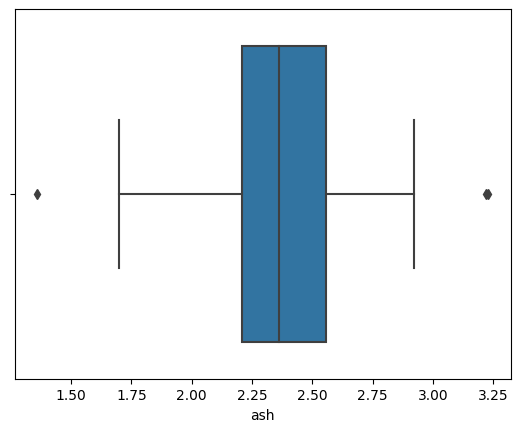

In [26]:
sns.boxplot(x=wine_df['ash'])

<AxesSubplot: xlabel='ash', ylabel='Density'>

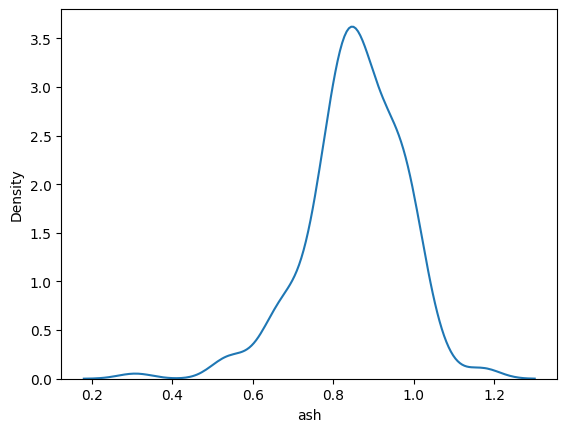

In [27]:
sns.kdeplot(np.log(wine_df['ash']))  #1st way handling by log

In [28]:
wine_df['ash']=np.log(wine_df['ash'])

In [29]:
skew(wine_df['ash'])

-0.7675435385388849

<AxesSubplot: xlabel='ash', ylabel='Density'>

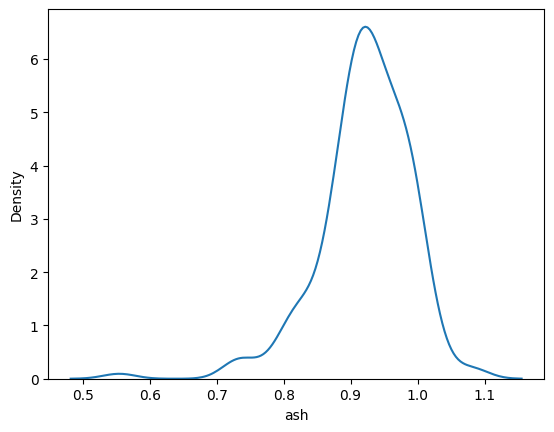

In [30]:
sns.kdeplot(np.sqrt(wine_df['ash']))     #2nd way handling by sqrt

In [31]:
wine_df['ash']=np.sqrt(wine_df['ash'])

In [32]:
skew(wine_df['ash'])

-1.283880735083671

In [33]:
def impute_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ',q1)
    print('Q2 == ',q2)
    print('Q3 == ',q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail = q3 + 1.5*iqr
    lower_tail = q1 - 1.5*iqr

    print('Upper Tail == ', upper_tail)
    print('Lower Tail == ', lower_tail)
    
    
    return upper_tail, lower_tail

upper_tail, lower_tail = impute_outliers(wine_df['ash'])

Q1 ==  0.8905012720539266
Q2 ==  0.9266399619256223
Q3 ==  0.9690345804868337
IQR ==  0.07853330843290707
Upper Tail ==  1.0868345431361943
Lower Tail ==  0.772701309404566


In [34]:
wine_df['ash']=np.where(wine_df['ash']>upper_tail,upper_tail,
                       np.where(wine_df['ash']<lower_tail,lower_tail,wine_df['ash']))

<AxesSubplot: xlabel='ash', ylabel='Density'>

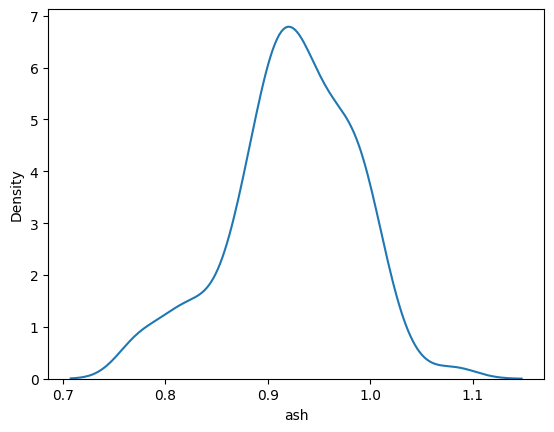

In [35]:
sns.kdeplot(wine_df['ash'])

<AxesSubplot: xlabel='ash'>

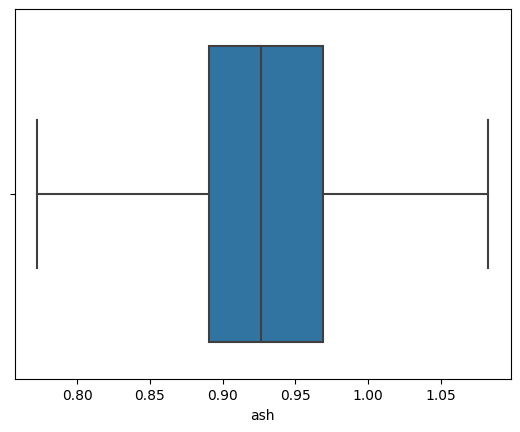

In [36]:
sns.boxplot(x=wine_df['ash'])

### 3.4 'alcalinity_of_ash'

<AxesSubplot: xlabel='alcalinity_of_ash', ylabel='Density'>

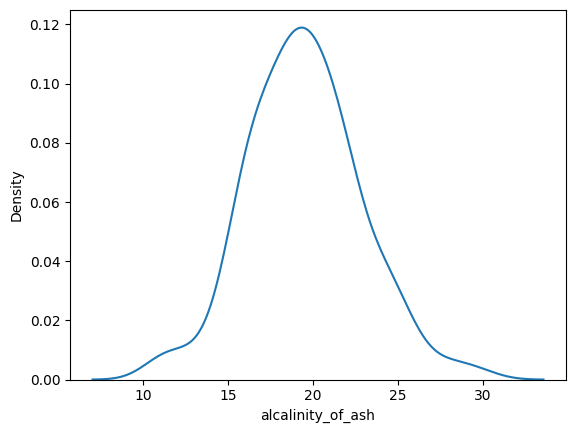

In [37]:
sns.kdeplot(wine_df['alcalinity_of_ash'])

In [38]:
wine_df['alcalinity_of_ash'].skew()

0.21304688642645586

## 3.5 magnesium

<AxesSubplot: xlabel='magnesium', ylabel='Density'>

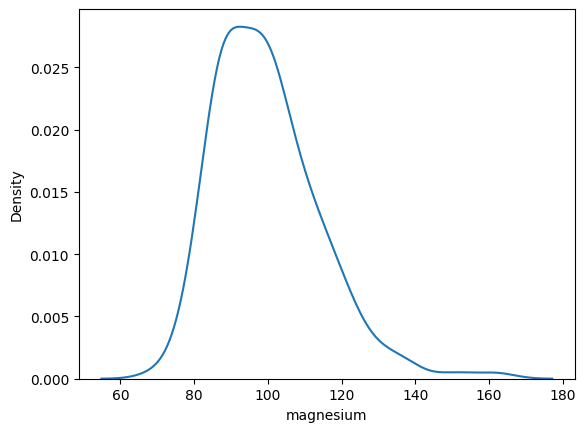

In [39]:
sns.kdeplot(wine_df['magnesium'])

In [40]:
skew(wine_df['magnesium'])

1.088914887210701

<AxesSubplot: xlabel='magnesium'>

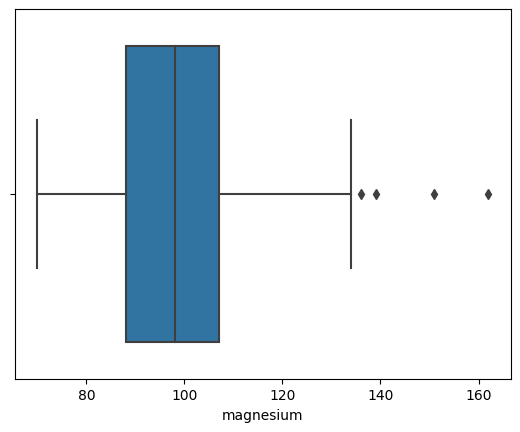

In [41]:
sns.boxplot(x=wine_df['magnesium'])

In [42]:
def impute_outliers(col):
    q1 = col.quantile(0.25)
    q2 = col.quantile(0.5)
    q3 = col.quantile(0.75)

    print('Q1 == ',q1)
    print('Q2 == ',q2)
    print('Q3 == ',q3)

    iqr = q3 - q1
    print('IQR == ',iqr)

    upper_tail = q3 + 1.5*iqr
    lower_tail = q1 - 1.5*iqr

    print('Upper Tail == ', upper_tail)
    print('Lower Tail == ', lower_tail)
    
    
    return upper_tail, lower_tail

upper_tail, lower_tail = impute_outliers(wine_df['magnesium'])

Q1 ==  88.0
Q2 ==  98.0
Q3 ==  107.0
IQR ==  19.0
Upper Tail ==  135.5
Lower Tail ==  59.5


In [43]:
wine_df['magnesium']=np.where(wine_df['magnesium']>upper_tail,upper_tail,wine_df['magnesium'])

<AxesSubplot: xlabel='magnesium', ylabel='Density'>

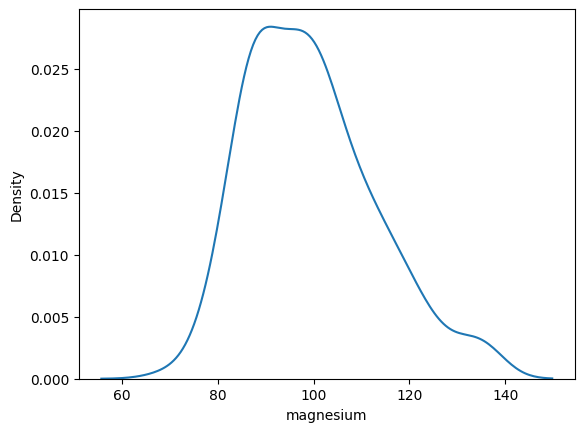

In [44]:
sns.kdeplot(wine_df['magnesium'])

<AxesSubplot: xlabel='magnesium'>

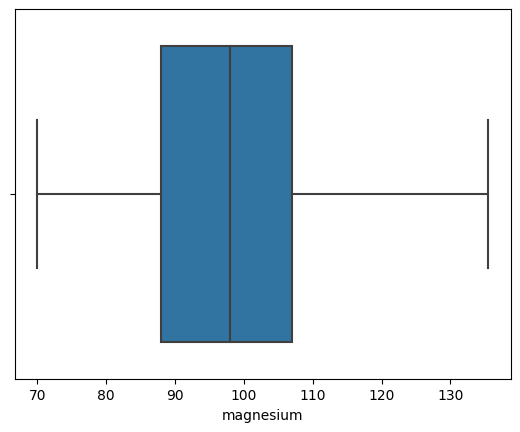

In [45]:
sns.boxplot(x=wine_df['magnesium'])

## 3.6 total_phenols

<AxesSubplot: xlabel='total_phenols', ylabel='Density'>

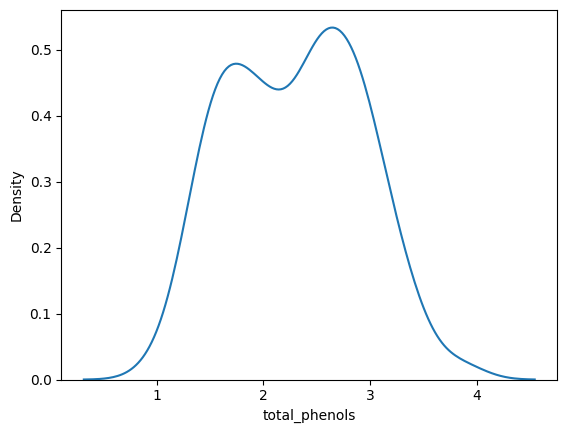

In [46]:
sns.kdeplot(wine_df['total_phenols'])

In [47]:
skew(wine_df['total_phenols'])

0.08590677016719508

<AxesSubplot: xlabel='total_phenols'>

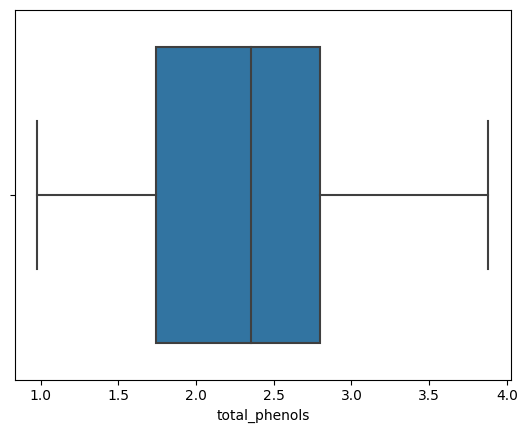

In [48]:
sns.boxplot(x=wine_df['total_phenols'])

## 3.7 flavanoids

<AxesSubplot: xlabel='flavanoids', ylabel='Density'>

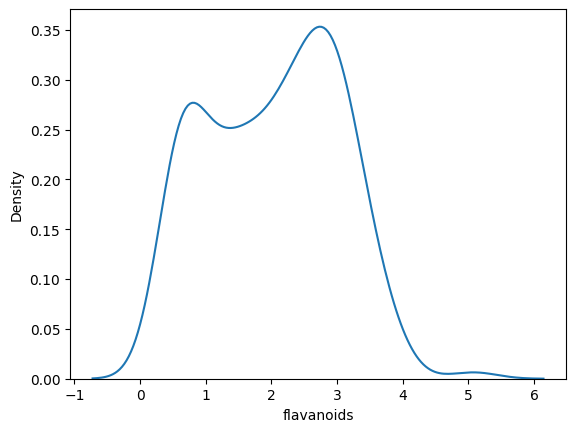

In [49]:
sns.kdeplot(wine_df['flavanoids'])

<AxesSubplot: xlabel='flavanoids'>

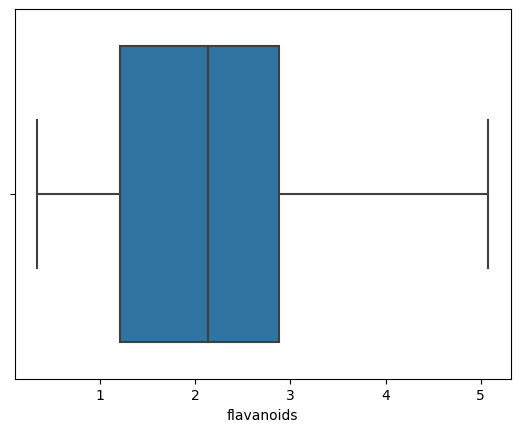

In [50]:
sns.boxplot(x=wine_df['flavanoids'])

## 3.8 nonflavanoid_phenols

<AxesSubplot: xlabel='nonflavanoid_phenols', ylabel='Density'>

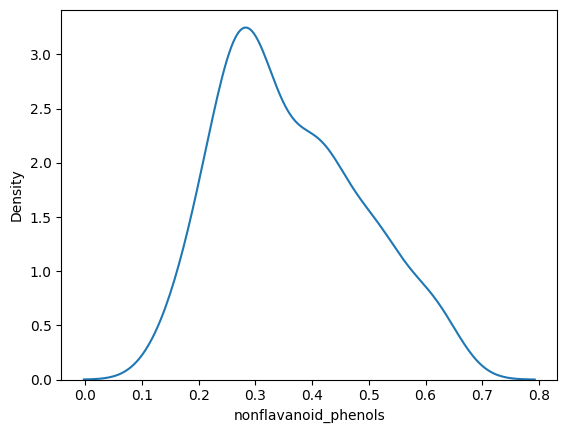

In [51]:
sns.kdeplot(wine_df['nonflavanoid_phenols'])

<AxesSubplot: xlabel='nonflavanoid_phenols'>

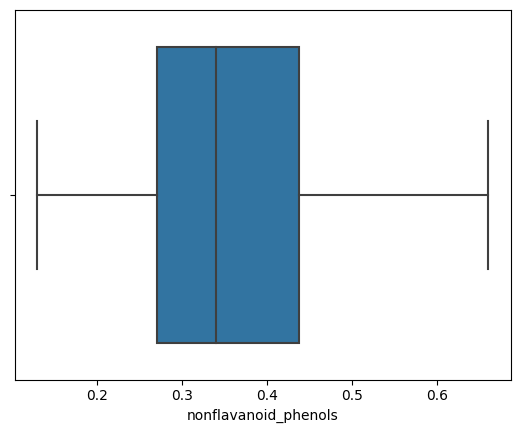

In [52]:
sns.boxplot(x=wine_df['nonflavanoid_phenols'])

## 3.9 proanthocyanins

<AxesSubplot: xlabel='proanthocyanins', ylabel='Density'>

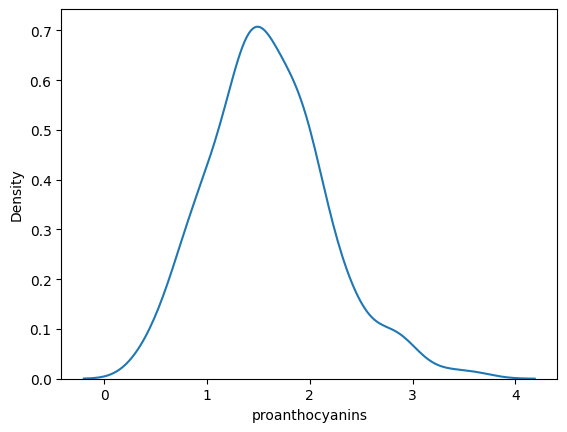

In [53]:
sns.kdeplot(wine_df['proanthocyanins'])

In [54]:
skew(wine_df['proanthocyanins'])

0.5127690334109938

<AxesSubplot: xlabel='proanthocyanins'>

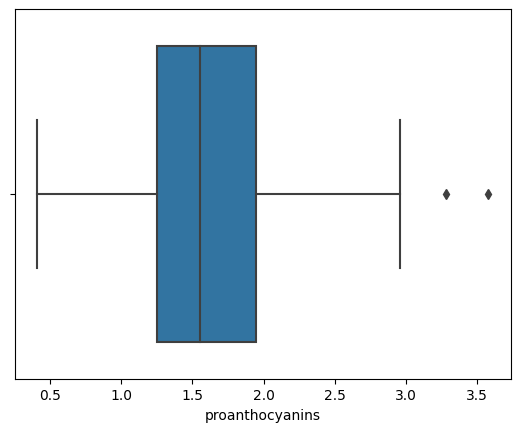

In [55]:
sns.boxplot(x=wine_df['proanthocyanins'])

In [56]:
upper_tail, lower_tail = impute_outliers(wine_df['proanthocyanins'])

Q1 ==  1.25
Q2 ==  1.5550000000000002
Q3 ==  1.95
IQR ==  0.7
Upper Tail ==  3.0
Lower Tail ==  0.20000000000000018


In [57]:
wine_df['proanthocyanins']=np.where(wine_df['proanthocyanins']>upper_tail,upper_tail,wine_df['proanthocyanins'])

<AxesSubplot: xlabel='proanthocyanins'>

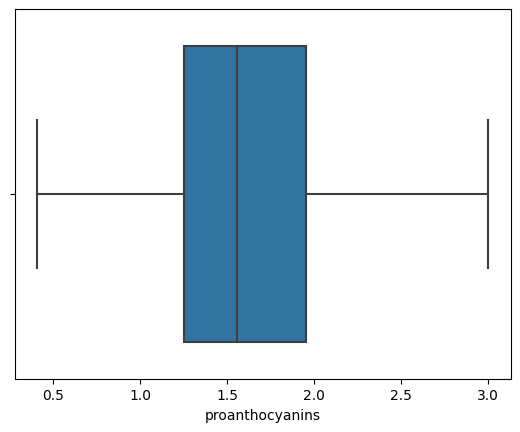

In [58]:
sns.boxplot(x=wine_df['proanthocyanins'])

## 3.9 color_intensity

<AxesSubplot: xlabel='color_intensity', ylabel='Density'>

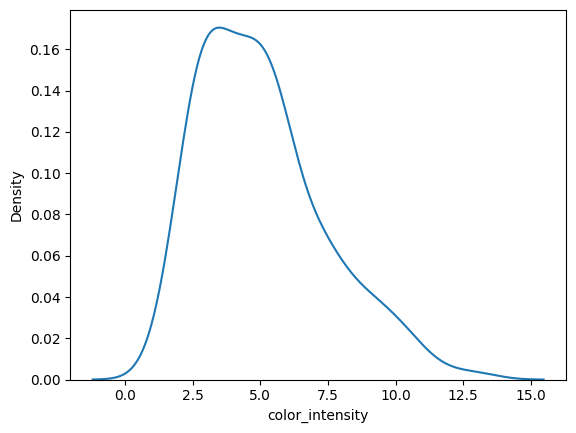

In [59]:
sns.kdeplot(wine_df['color_intensity'])

In [60]:
skew(wine_df['color_intensity'])

0.8612480547740543

<AxesSubplot: xlabel='color_intensity'>

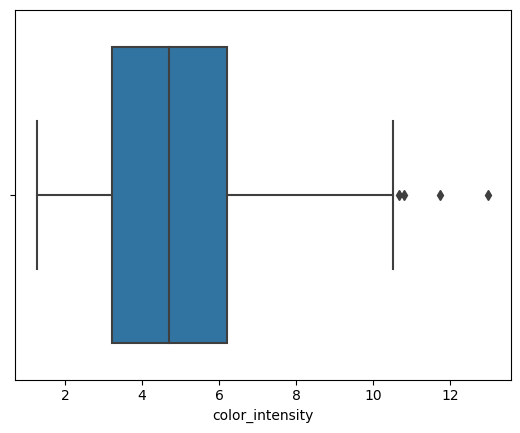

In [61]:
sns.boxplot(x=wine_df['color_intensity'])

In [62]:
upper_tail,lower_tail=impute_outliers(wine_df['color_intensity'])

Q1 ==  3.2199999999999998
Q2 ==  4.6899999999999995
Q3 ==  6.2
IQR ==  2.9800000000000004
Upper Tail ==  10.670000000000002
Lower Tail ==  -1.2500000000000009


In [63]:
wine_df['color_intensity']=np.where(wine_df['color_intensity']>upper_tail,upper_tail,wine_df['color_intensity'])

<AxesSubplot: xlabel='color_intensity'>

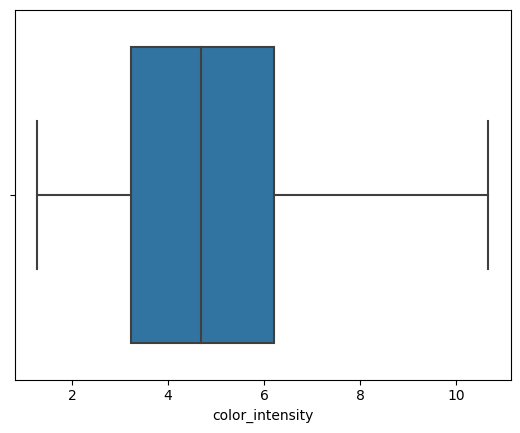

In [64]:
sns.boxplot(x=wine_df['color_intensity'])

## 3.10 hue

<AxesSubplot: xlabel='hue', ylabel='Density'>

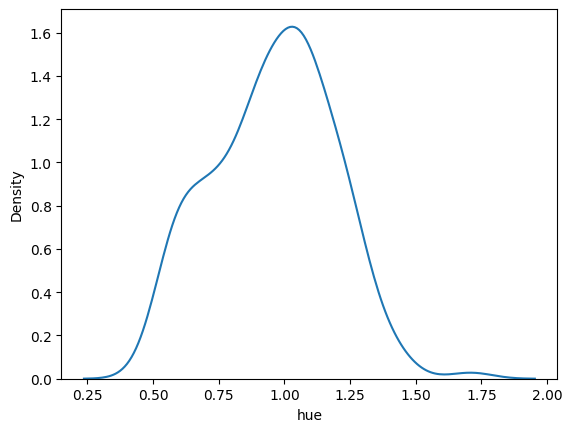

In [65]:
sns.kdeplot(wine_df['hue'])

<AxesSubplot: xlabel='hue'>

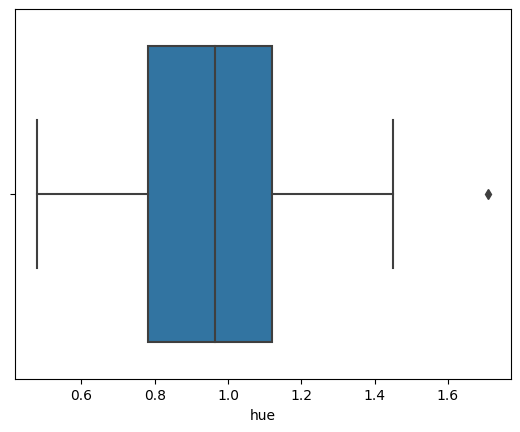

In [66]:
sns.boxplot(x=wine_df['hue'])

In [67]:
upper_tail,lower_tail=impute_outliers(wine_df['hue'])

Q1 ==  0.7825
Q2 ==  0.965
Q3 ==  1.12
IQR ==  0.33750000000000013
Upper Tail ==  1.6262500000000002
Lower Tail ==  0.2762499999999998


In [68]:
wine_df['hue']=np.where(wine_df['hue']>upper_tail,upper_tail,wine_df['hue'])

<AxesSubplot: xlabel='hue'>

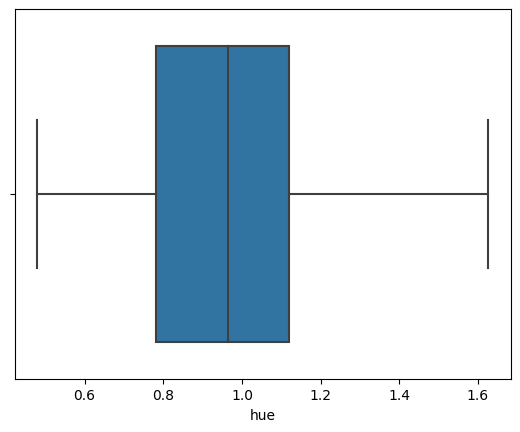

In [69]:
sns.boxplot(x=wine_df['hue'])

## 3.11 od280/od315_of_diluted_wines

<AxesSubplot: xlabel='od280/od315_of_diluted_wines', ylabel='Density'>

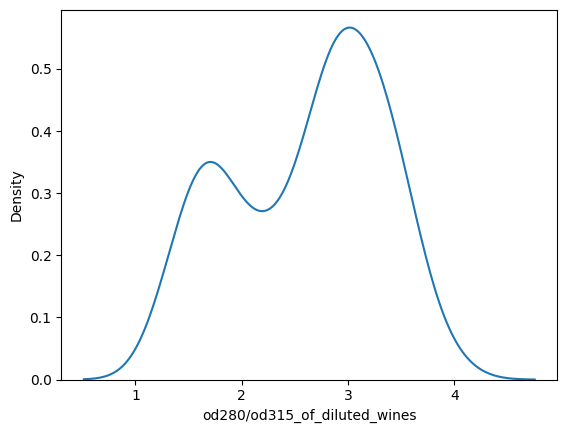

In [70]:
sns.kdeplot(wine_df['od280/od315_of_diluted_wines'])

<AxesSubplot: xlabel='od280/od315_of_diluted_wines'>

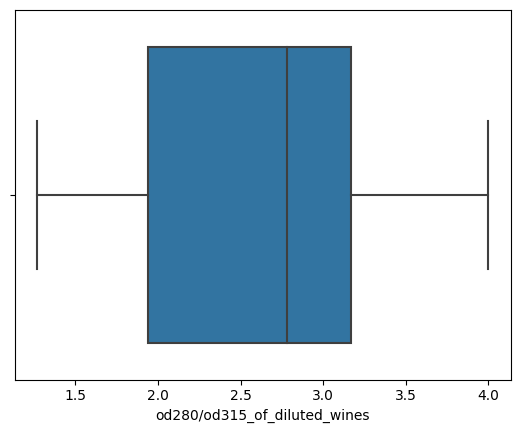

In [71]:
sns.boxplot(x=wine_df['od280/od315_of_diluted_wines'])

In [72]:
#3.12 proline

<AxesSubplot: xlabel='proline', ylabel='Density'>

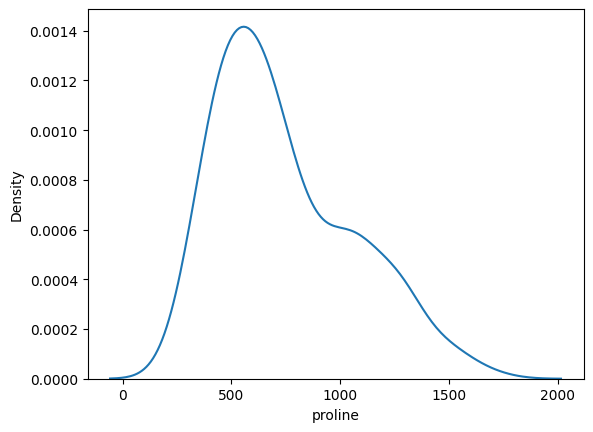

In [73]:
sns.kdeplot(wine_df['proline'])

<AxesSubplot: xlabel='proline'>

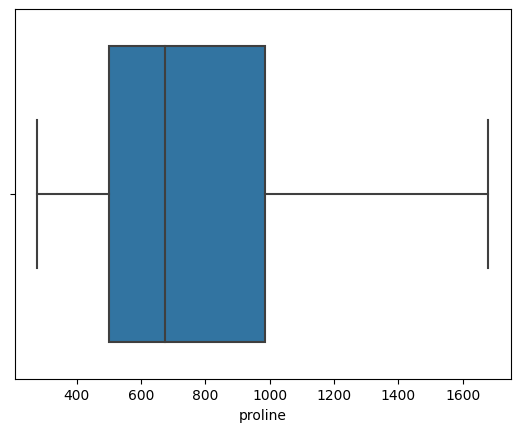

In [74]:
sns.boxplot(x=wine_df['proline'])

In [75]:
wine_df['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [76]:
wine_df.corr().tail(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
class,-0.328222,0.395145,-0.043643,0.517859,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.26026,-0.621549,-0.78823,-0.633717,1.0


## 4. Feature Engineering


## 5. Feature Selection

In [77]:
x=wine_df.drop('class',axis=1)
y=wine_df['class']

## 6. Model Training


## Train test Split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [79]:
y_test

12     0
23     0
166    2
25     0
35     0
13     0
65     1
171    2
112    1
48     0
78     1
3      0
6      0
158    2
149    2
122    1
42     0
2      0
29     0
157    2
130    2
45     0
106    1
94     1
5      0
53     0
93     1
41     0
54     0
24     0
133    2
64     1
151    2
153    2
28     0
113    1
Name: class, dtype: int32

In [80]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [81]:
linear_reg.predict(x_test)

array([ 0.03460957,  0.26827282,  2.15884359,  0.49025495,  0.34736682,
       -0.52528922,  0.68046741,  2.31416426,  0.83605356,  0.35394112,
        0.66265869, -0.06859595, -0.16579733,  2.1119023 ,  1.99020404,
        1.17885966, -0.20851666,  0.11634752,  0.2213354 ,  2.16374417,
        1.28606545,  0.31094945,  0.85460059,  1.15961501, -0.21862644,
        0.0615205 ,  0.89390578,  0.41863904,  0.16386243,  0.23761749,
        1.75191569,  1.04082902,  2.21277629,  2.08064902,  0.12711819,
        1.21558025])

In [82]:
linear_reg.coef_

array([-1.23302385e-01,  8.16117936e-02, -7.67560962e-01,  5.01713371e-02,
       -1.79637771e-03,  1.86166084e-01, -4.21292366e-01, -2.98457056e-01,
        1.90815460e-02,  9.49554810e-02, -1.16885031e-01, -1.81529009e-01,
       -6.80043222e-04])

In [83]:
linear_reg.intercept_

3.5198120399819572

## 7. Evaluation

In [84]:
def evaluation(model, ind_var, y_act):
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(y_act, pred)
    print('MSE:', mse)

    rmse = np.sqrt(mse)
    print('RMSE:', rmse)

    mae = mean_absolute_error(y_act, pred)
    print('MAE:', mae)

    r_squared = r2_score(y_act, pred)
    print('R-Squared Value :', r_squared)

print('Test Data Evaluation'.center(50,'*'))
evaluation(linear_reg, x_test, y_test)



***************Test Data Evaluation***************
MSE: 0.07121553069264612
RMSE: 0.26686238156144476
MAE: 0.22277092385233777
R-Squared Value : 0.8964137735379692


In [85]:
print('Train Data Evaluation'.center(50,'*'))
evaluation(linear_reg, x_train, y_train)


**************Train Data Evaluation***************
MSE: 0.05935904332461879
RMSE: 0.2436371140130723
MAE: 0.19234584853624725
R-Squared Value : 0.8946005856289527


In [86]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [88]:
import pickle

In [89]:
with open('Linear_model.pkl', 'wb') as f:
    pickle.dump(linear_reg, f)